# knn

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [16]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in X.columns:
    X[i]=sc.fit_transform(X[[i]])

In [139]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,params,cv=5,scoring='roc_auc')
GS.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [140]:
GS.best_params_

{'n_neighbors': 32, 'weights': 'distance'}

In [24]:
from sklearn.ensemble import BaggingClassifier

In [129]:
knn=KNeighborsClassifier(n_neighbors=132,weights='distance')#weight is distance so we cannot give random state as it will  be based on distance
bag_model=BaggingClassifier(base_estimator=knn,n_estimators=7,random_state=0)

In [130]:
models=[]
models.append(('knnn',knn))
models.append(('BaggedD knn',bag_model))

In [131]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import  model_selection

knnn: 0.823278 (0.000990)
BaggedD knn: 0.820993 (0.000880)


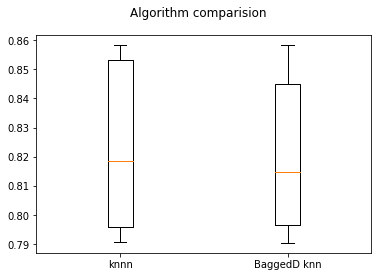

In [132]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure()
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [133]:
(0.000990-0.000880)/0.000990 #bagged knn is better model as bias error difference is negligible

0.11111111111111108

In [134]:
(0.823278-0.820993)/0.823278

0.0027754901746432936

In [135]:
results

[array([0.85822231, 0.79591837, 0.81837645, 0.85325292, 0.79062009]),
 array([0.84489958, 0.79664723, 0.81480821, 0.85818713, 0.79042386])]

In [136]:
bag_model.fit(X,y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=132, p=2,
                                                      weights='distance'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=7, n_jobs=None, oob_score=False,
                  random_state=0, verbose=0, warm_start=False)

# Naivesbayes

In [148]:
df=pd.read_csv("iris.csv",header=None)

In [149]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [157]:
X=df.drop([0,1,4],axis=1)

In [151]:
X.head()

,2,3
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [152]:
def my_gpdf(x,mean,sd):
    exponent=np.exp(-((x-mean)**2/(2*sd**2)))
    return (1/(np.sqrt(2*np.pi)*sd))*exponent

In [171]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in X.columns:
    X[i]=sc.fit_transform(X[[i]])

In [154]:
from sklearn.naive_bayes import GaussianNB

In [158]:
X.rename({2:'PL',3:'PW'},inplace=True,axis=1)

In [160]:
X.head()

,PL,PW
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [161]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [162]:
y=df[4]

In [172]:
new=pd.concat([X,y],axis=1,join='outer')

In [168]:
new[4].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: 4, dtype: int64

In [176]:
grp1=new[new[4]=='Iris-setosa'][['PL','PW']]
grp2=new[new[4]=='Iris-virginica'][['PL','PW']]
grp3=new[new[4]=='Iris-versicolor'][['PL','PW']]

In [178]:
grp1.describe()

,PL,PW
count,50.000000,50.000000
mean,-1.304878,-1.255129
std,0.098668,0.140952
min,-1.568735,-1.444450
25%,-1.341272,-1.312977
50%,-1.284407,-1.312977
75%,-1.241757,-1.181504
max,-1.056944,-0.787085


In [179]:
grp2.describe()

,PL,PW
count,50.000000,50.000000
mean,1.019792,1.087720
std,0.313839,0.361091
min,0.421564,0.264699
25%,0.762759,0.790591
50%,1.018654,1.053537
75%,1.203468,1.447956
max,1.786341,1.710902


In [180]:
new.groupby([4]).describe()

PL                                                    \
                count      mean       std       min       25%       50%   
4                                                                         
Iris-setosa      50.0 -1.304878  0.098668 -1.568735 -1.341272 -1.284407   
Iris-versicolor  50.0  0.285087  0.267218 -0.431421  0.137236  0.336266   
Iris-virginica   50.0  1.019792  0.313839  0.421564  0.762759  1.018654   

                                       PW                                \
                      75%       max count      mean       std       min   
4                                                                         
Iris-setosa     -1.241757 -1.056944  50.0 -1.255129  0.140952 -1.444450   
Iris-versicolor  0.478430  0.762759  50.0  0.167409  0.259991 -0.261193   
Iris-virginica   1.203468  1.786341  50.0  1.087720  0.361091  0.264699   

                                                         
                      25%       50%       75%       max  
4                                                        
Iris-setosa     -1.312977 -1.312977 -1.181504 -0.787085  
Iris-versicolor  0.001753  0.133226  0.396172  0.790591  
Iris-virginica   0.790591  1.053537  1.447956  1.710902

test data 1

x1

In [198]:
my_gpdf(0.53529,0.285087,0.267218)*my_gpdf(0.5276,0.167409,0.259991) *1/3#versicolor pw #versicolor pl 

0.18867921332661355

In [199]:
my_gpdf(0.53529,-1.304878,0.098668)*my_gpdf(0.5276,-1.255129,0.140952)*1/3#setosa pw#setosa pl

2.068883429099033e-110

In [200]:
my_gpdf(0.53529,1.019792,0.313839)*my_gpdf(0.5276,1.087720,0.361091)*1/3#virginica pw#virginica pl

0.04269270981555689

test data 2 [-1.398,-1.3129]

x1

In [204]:
my_gpdf(-1.398,-1.304878,0.098668)*my_gpdf(-1.3129,-1.255129,0.140952)*(1/3)#setosa pw#setosa pl

2.246731057137385

In [202]:
my_gpdf(-1.398,0.285087,0.267218)*my_gpdf(-1.3129,0.167409,0.259991)*1/3#versicolor pw#versicolor pl 

1.6933491560269706e-16

In [203]:
my_gpdf(-1.398,1.019792,0.313839)*my_gpdf(-1.3129,1.087720,0.361091)*1/3#virginica pw#virginica pl

1.530640926146968e-23

test data 3 [1.047,1.185]

In [205]:
my_gpdf(1.047,-1.304878,0.098668)*my_gpdf(1.185,-1.255129,0.140952)*(1/3)#setosa pw#setosa pl

1.339097437936306e-188

In [206]:
my_gpdf(1.047,0.285087,0.267218)*my_gpdf(1.185,0.167409,0.259991)*1/3#versicolor pw#versicolor pl 

6.180715843510243e-06

In [207]:
my_gpdf(1.047,1.019792,0.313839)*my_gpdf(1.185,1.087720,0.361091)*1/3#virginica pw#virginica pl

0.4497620614333546

In [208]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [209]:
navbayes_model=GaussianNB()
nb_bag=BaggingClassifier(base_estimator=navbayes_model,n_estimators=31,random_state=0)
nb_boostada=AdaBoostClassifier(base_estimator=navbayes_model,n_estimators=50,random_state=0)

In [210]:
models=[]
models.append(('NB',navbayes_model))
models.append(('BaggedNB',nb_bag))
models.append(('Adaboost_NB',nb_boostada))


In [216]:
models

[('NB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('BaggedNB',
  BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                    bootstrap=True, bootstrap_features=False, max_features=1.0,
                    max_samples=1.0, n_estimators=31, n_jobs=None,
                    oob_score=False, random_state=0, verbose=0, warm_start=False)),
 ('Adaboost_NB', AdaBoostClassifier(algorithm='SAMME.R',
                     base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                     learning_rate=1.0, n_estimators=50, random_state=0))]

In [213]:
y=df[4]

NB: 0.966860 (0.002190)
BaggedNB: 0.966860 (0.002190)
Adaboost_NB: 0.959649 (0.001936)


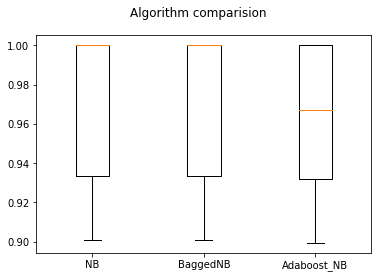

In [217]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='f1_weighted')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure()
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [218]:
diabteic=pd.read_csv("diabetes.csv")

In [220]:
X=diabteic.drop('Outcome',axis=1)
y=diabteic['Outcome']

In [221]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in X.columns:
    X[i]=sc.fit_transform(X[[i]])

In [250]:
navbayes_model=GaussianNB()
nb_bag=BaggingClassifier(base_estimator=navbayes_model,n_estimators=6,random_state=0)
nb_boostada=AdaBoostClassifier(base_estimator=navbayes_model,n_estimators=31,random_state=0)
knn=KNeighborsClassifier(n_neighbors=132,weights='distance')#weight is distance so we cannot give random state as it will  be based on distance
bag_model=BaggingClassifier(base_estimator=knn,n_estimators=6,random_state=0)

In [251]:
models=[]
models.append(('knnn',knn))
models.append(('BaggedD knn',bag_model))
models.append(('NB',navbayes_model))
models.append(('BaggedNB',nb_bag))
models.append(('Adaboost_NB',nb_boostada))

knnn: 0.823278 (0.000990)
BaggedD knn: 0.819335 (0.000969)
NB: 0.814060 (0.001059)
BaggedNB: 0.811199 (0.000856)
Adaboost_NB: 0.590849 (0.002458)


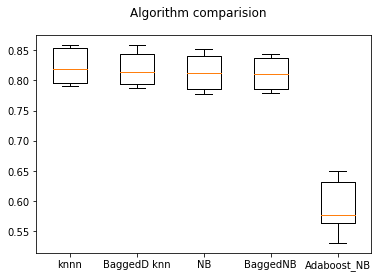

In [252]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure()
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [255]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 

In [256]:
rf_model=RandomForestClassifier(n_estimators=33,criterion='entropy',random_state=0)
model_grad=GradientBoostingClassifier(n_estimators=85,random_state=0)

In [257]:
models.append(('RandomForest',rf_model))
models.append(('GradientBoosting',model_grad))

In [263]:
stacked=VotingClassifier(estimators=[('Bagged_NB',nb_bag),('GBOOst',model_grad),('RandomForest',rf_model)],voting='soft')

In [264]:
models=[]
models.append(('BaggedNB',nb_bag))
models.append(('RandomForest',rf_model))
models.append(('GradientBoosting',model_grad))
models.append(('Stacked',stacked))



BaggedNB: 0.811199 (0.000856)
RandomForest: 0.824122 (0.000544)
GradientBoosting: 0.828376 (0.000482)
Stacked: 0.833832 (0.000961)


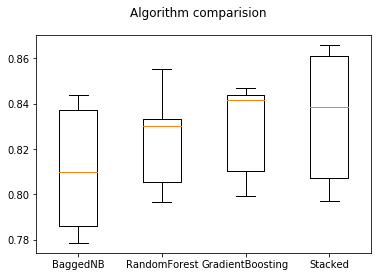

In [265]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure()
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

BAseball

In [351]:
df=pd.read_csv("baseball.csv")

In [ ]:
#RA-RUNS ALLOWED
#RS-RUNS SCORED
#OBP-ON BASE PERCENTAGE--SHOULD BE HIGHER
#SLG-SLUGGING PERCENTAGE--SHOULD BE HIGHER
#BA-BATTING AVERAGE
#OOBP-OPPONENTS OBP
#OSLG-OPPONENTS SLG
#W-NO OF WINS IN THAT SEASON


In [271]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [352]:
df['RD']=df['RS']-df['RA'] #runs difference runs score with runs allowed
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [274]:
df.shape

(1232, 16)

In [353]:
new=df[df['Year']<2002] #data less than year 2002
new.shape

(902, 16)

In [276]:
new.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


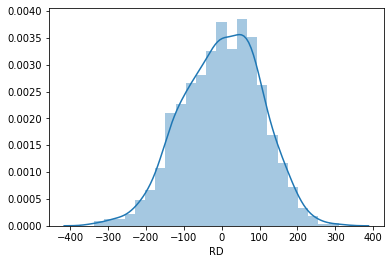

In [277]:
sns.distplot(df['RD'])

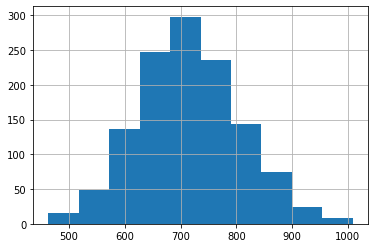

In [279]:
df['RS'].hist(bins=10)

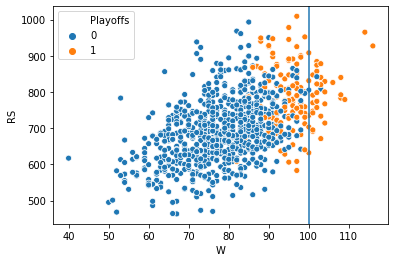

In [282]:
sns.scatterplot(new['W'],new['RS'],hue=new['Playoffs'])
plt.axvline(x=100)

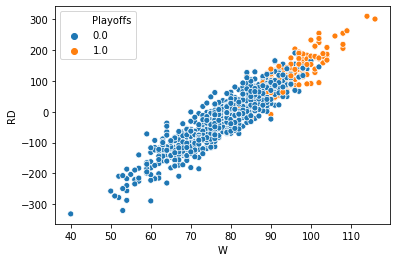

In [283]:
sns.scatterplot(new['W'],df['RD'],hue=new['Playoffs'])

In [284]:
from sklearn.linear_model import LinearRegression,LogisticRegression

data cleaning

In [285]:
new.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
Year,1.000000e+00,0.485502,0.483072,0.002756,0.474799,0.517828,0.438729,0.113014,0.415645,0.426403,-0.027085,-0.335533,-0.122668,-4.316055e-19
RS,4.855023e-01,1.000000,0.415014,0.507382,0.904909,0.926384,0.831625,0.371631,0.135743,0.323624,0.056206,0.091057,0.039787,5.375395e-01
RA,4.830717e-01,0.415014,1.000000,-0.507772,0.367105,0.459514,0.350411,-0.241213,0.539387,0.382416,-0.037402,0.909908,0.895110,-5.441052e-01
W,2.755645e-03,0.507382,-0.507772,1.000000,0.474080,0.405972,0.416391,0.588978,-0.747960,-0.235038,0.108128,-0.633657,-0.646920,9.385150e-01
OBP,4.747989e-01,0.904909,0.367105,0.474080,1.000000,0.806154,0.854055,0.345530,0.146153,0.300446,-0.003827,0.052899,-0.008316,4.942505e-01
SLG,5.178276e-01,0.926384,0.459514,0.405972,0.806154,1.000000,0.814068,0.300191,0.217315,0.341013,0.012873,0.101632,0.080376,4.284077e-01
BA,4.387291e-01,0.831625,0.350411,0.416391,0.854055,0.814068,1.000000,0.278772,0.156881,0.229791,-0.001805,0.219021,0.231918,4.421417e-01
Playoffs,1.130136e-01,0.371631,-0.241213,0.588978,0.345530,0.300191,0.278772,1.000000,NaN,NaN,0.009831,-0.495725,-0.510097,5.662745e-01
RankSeason,4.156449e-01,0.135743,0.539387,-0.747960,0.146153,0.217315,0.156881,NaN,1.000000,0.352961,0.052870,0.141905,0.235886,-5.703690e-01
RankPlayoffs,4.264030e-01,0.323624,0.382416,-0.235038,0.300446,0.341013,0.229791,NaN,0.352961,1.000000,0.012394,0.299376,0.318576,-7.677988e-02


In [338]:
new['OOBP'].fillna(new['OOBP'].median(),inplace=True)
new['OSLG'].fillna(new['OSLG'].median(),inplace=True)
new['RA'].fillna(new['RA'].median(),inplace=True)
new['RD'].fillna(new['RD'].median(),inplace=True)
new['W'].fillna(new['W'].median(),inplace=True)
new['OBP'].fillna(new['OBP'].median(),inplace=True)
new['SLG'].fillna(new['SLG'].median(),inplace=True)
new['RS'].fillna(new['RS'].median(),inplace=True)

C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [354]:

for i in new.columns:
    new[i]=new[i].fillna(new[i].dropna().sample().iloc[0])  #replace with sample

C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [355]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 16 columns):
Team            902 non-null object
League          902 non-null object
Year            902 non-null int64
RS              902 non-null int64
RA              902 non-null int64
W               902 non-null int64
OBP             902 non-null float64
SLG             902 non-null float64
BA              902 non-null float64
Playoffs        902 non-null int64
RankSeason      902 non-null float64
RankPlayoffs    902 non-null float64
G               902 non-null int64
OOBP            902 non-null float64
OSLG            902 non-null float64
RD              902 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 119.8+ KB


knn is the best approch to replace the null values

In [356]:
new.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
Year,1.000000e+00,0.485502,0.483072,0.002756,0.474799,0.517828,0.438729,0.113014,0.015671,0.011380,-0.027085,-0.264652,-0.031057,-4.316055e-19
RS,4.855023e-01,1.000000,0.415014,0.507382,0.904909,0.926384,0.831625,0.371631,-0.262869,-0.230352,0.056206,-0.170052,-0.010075,5.375395e-01
RA,4.830717e-01,0.415014,1.000000,-0.507772,0.367105,0.459514,0.350411,-0.241213,0.312669,0.278273,-0.037402,0.028320,0.228800,-5.441052e-01
W,2.755645e-03,0.507382,-0.507772,1.000000,0.474080,0.405972,0.416391,0.588978,-0.560691,-0.506353,0.108128,-0.177776,-0.209692,9.385150e-01
OBP,4.747989e-01,0.904909,0.367105,0.474080,1.000000,0.806154,0.854055,0.345530,-0.238470,-0.211627,-0.003827,-0.157442,-0.021010,4.942505e-01
SLG,5.178276e-01,0.926384,0.459514,0.405972,0.806154,1.000000,0.814068,0.300191,-0.186230,-0.166570,0.012873,-0.193792,-0.004708,4.284077e-01
BA,4.387291e-01,0.831625,0.350411,0.416391,0.854055,0.814068,1.000000,0.278772,-0.187203,-0.179416,-0.001805,-0.080553,0.047450,4.421417e-01
Playoffs,1.130136e-01,0.371631,-0.241213,0.588978,0.345530,0.300191,0.278772,1.000000,-0.791421,-0.811482,0.009831,-0.201643,-0.193799,5.662745e-01
RankSeason,1.567110e-02,-0.262869,0.312669,-0.560691,-0.238470,-0.186230,-0.187203,-0.791421,1.000000,0.768307,0.006528,0.102963,0.127193,-5.322023e-01
RankPlayoffs,1.138026e-02,-0.230352,0.278273,-0.506353,-0.211627,-0.166570,-0.179416,-0.811482,0.768307,1.000000,-0.004771,0.093545,0.118132,-4.703370e-01


RS

In [357]:
x=new[['OBP','SLG']]
y=new['RS']

In [358]:
LR=LinearRegression()
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [359]:
LR.intercept_

-804.62706106224

In [360]:
LR.coef_

array([2737.76802227, 1584.90860546])

RA

In [361]:
x1=new[['OOBP','OSLG']]
y1=new['RA']
LR2=LinearRegression()
LR2.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [362]:
LR2.intercept_

162.9408133738234

In [363]:
LR2.coef_

array([-4581.91950258,  4933.00761318])

Wins

In [364]:
x=new[['RD']].values
y=new[['W']].values
w_model=LinearRegression()
w_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [365]:
w_model.intercept_

array([80.88137472])

In [366]:
w_model.coef_

array([[0.10576562]])

In [368]:
LR.predict([[0.339,0.430]])

array([804.98699884])

In [369]:
LR2.predict([[0.307,0.373]])

array([596.3033658])

In [370]:
804.98699884-596.3033658

208.6836330399999

In [371]:
w_model.predict([[208.6836330399999]])

array([[102.95292907]])

In [373]:
w_model.score(x,y)

0.8808103719972755

In [375]:
new1=df[df['Year']<2002] #data less than year 2002
new1.shape

(902, 16)

In [377]:
new=new1.dropna()
new.shape

(24, 16)

In [378]:

for i in new.columns:
    new[i]=new[i].fillna(new[i].dropna().sample().iloc[0])  #replace with sample

C:\Users\Jasar Althaf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [379]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 331 to 418
Data columns (total 16 columns):
Team            24 non-null object
League          24 non-null object
Year            24 non-null int64
RS              24 non-null int64
RA              24 non-null int64
W               24 non-null int64
OBP             24 non-null float64
SLG             24 non-null float64
BA              24 non-null float64
Playoffs        24 non-null int64
RankSeason      24 non-null float64
RankPlayoffs    24 non-null float64
G               24 non-null int64
OOBP            24 non-null float64
OSLG            24 non-null float64
RD              24 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 3.2+ KB


knn is the best approch to replace the null values

In [380]:
new.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
Year,1.000000,-0.317640,-0.230375,-0.098889,-0.539825,-0.230946,-0.388981,NaN,0.093750,0.000000,-0.255377,-0.312382,-0.157257,-0.072955
RS,-0.317640,1.000000,0.627842,0.274095,0.812023,0.845777,0.751686,NaN,-0.302725,0.335761,-0.035961,0.599194,0.483290,0.347070
RA,-0.230375,0.627842,1.000000,-0.459207,0.554025,0.700631,0.515410,NaN,0.230005,0.191895,-0.234072,0.894935,0.839802,-0.512054
W,-0.098889,0.274095,-0.459207,1.000000,0.229150,0.041865,0.310554,NaN,-0.687730,0.090597,0.281621,-0.469601,-0.441674,0.855791
OBP,-0.539825,0.812023,0.554025,0.229150,1.000000,0.609070,0.710836,NaN,-0.205925,0.156477,0.171927,0.589891,0.450270,0.228567
SLG,-0.230946,0.845777,0.700631,0.041865,0.609070,1.000000,0.745964,NaN,-0.157391,0.273143,-0.098566,0.631258,0.654687,0.089168
BA,-0.388981,0.751686,0.515410,0.310554,0.710836,0.745964,1.000000,NaN,-0.073671,0.198742,0.160544,0.405035,0.481329,0.208510
Playoffs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RankSeason,0.093750,-0.302725,0.230005,-0.687730,-0.205925,-0.157391,-0.073671,NaN,1.000000,-0.084788,-0.063844,0.141905,0.235886,-0.611216
RankPlayoffs,0.000000,0.335761,0.191895,0.090597,0.156477,0.273143,0.198742,NaN,-0.084788,1.000000,0.222715,0.299376,0.318576,0.139317


RS

In [381]:
x=new[['OBP','SLG']]
y=new['RS']

In [382]:
LR=LinearRegression()
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [383]:
LR.intercept_

-1063.2254475091913

In [384]:
LR.coef_

array([2724.40798084, 2190.91660661])

RA

In [385]:
x1=new[['OOBP','OSLG']]
y1=new['RA']
LR2=LinearRegression()
LR2.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [386]:
LR2.intercept_

-775.1623486135553

In [387]:
LR2.coef_

array([3225.00378812, 1106.50390975])

Wins

In [388]:
x=new[['RD']].values
y=new[['W']].values
w_model=LinearRegression()
w_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [389]:
w_model.intercept_

array([84.09190385])

In [390]:
w_model.coef_

array([[0.08469339]])

In [391]:
LR.predict([[0.339,0.430]])

array([802.44299884])

In [392]:
LR2.predict([[0.307,0.373]])

array([627.63977268])

In [396]:
802.44299884-627.63977268

174.80322616

In [397]:
w_model.predict([[174.80322616]])

array([[98.89658104]])

In [398]:
w_model.score(x,y)

0.7323787583365337